In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq
from scipy.signal import sawtooth
import pandas as pd
from scipy.fft import ifft

# Q5: Real world example (Bonous question)

The two point correlation function is like autocorrelation but for multi-dimensional data. Here instead of "lags" we use distances.

The file `cmb_camb_N1024_PS12.npy` is part of the CMB temperature map, you can read it directly using `np.load` function.

Calculate the two point correlation for the CMB map, plot it, and then calculate the power spectrum and plot it too.

P.S. the provided data is 1024$\times$1024, it needs too much computational power to calculate correlation for every point. You may use only a fraction of data points, if they are chosen randomly, the result would be the same. Also for the distances, you do not need to cover the whole length of the image.

In [ ]:
cmb=np.load (r"/content/drive/MyDrive/cosmology/cmb_camb_N1024_PS12 (1).npy")

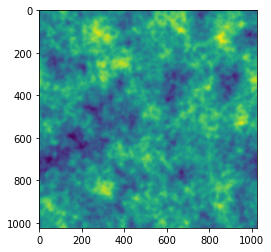

In [ ]:
imgplot = plt.imshow(cmb)

In [ ]:
cmb=cmb-np.mean(cmb)
cmb= cmb/np.std(cmb)



211.5606722717841 261.0
0.8105772883976403 261.0


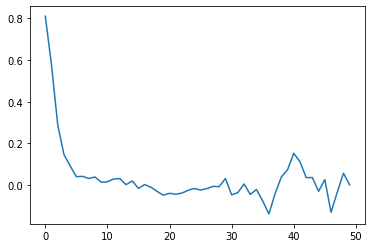

In [ ]:
def newautocorr(pic,bins,how_many):
  c= np.zeros(bins)
  j= np.ones(bins)
  for i in range(how_many):
    x1,x2,y1,y2 = np.random.randint(0,len(pic),4)
    r= np.sqrt((x2-x1)**2+(y1-y2)**2) 
    #5.5 = 5.1 = 5 .... => kelas
    dl= np.sqrt(2*len(pic)**2)/bins
    k = int (r/dl)
    c[k]+= pic[x1,y1]*pic[x2,y2]
    j[k]+=1

  print(c[0],j[0])
  c= c/j
  print(c[0],j[0])

  return c

def normal(x):
  return (x-np.mean(x))/np.std(x)


bins=50
n=100000

cmb=normal(cmb)
print('\n')

a=newautocorr(cmb,bins,n)
#print(a)
plt.figure()
plt.plot(a)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


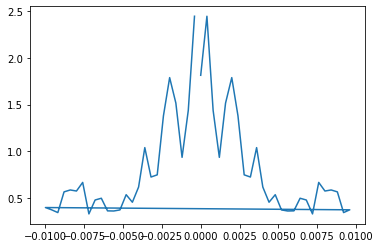

In [ ]:
F= fft(a)
K=fftfreq(len(a),bins)
plt.plot(K,F)